In [1]:
import re
import datasets
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import MaxNLocator

In [2]:
os.chdir('..')

In [3]:
from src.template import template_matching

In [4]:
esnli = datasets.load_dataset("esnli")

Found cached dataset esnli (/Users/lorenzorota/.cache/huggingface/datasets/esnli/plain_text/0.0.2/a160e6a02bbb8d828c738918dafec4e7d298782c334b5109af632fec6d779bbc)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
data = pd.read_csv('results/allResults.csv')

In [8]:
labels_dict = {
    0 : "entailment",
    1 : "neutral",
    2 : "contradiction"
}

In [11]:
esnli_train_df = pd.DataFrame(esnli['train'])

In [12]:
esnli_train_df['label'] = esnli_train_df['label'].map(labels_dict)

Implementation of all template related stuff

Run over all

In [13]:
stats_explanation_model = template_matching(data['premise'], data['hypothesis'], data['label'], data['rug-nlp-nli/flan-base-nli-explanation_prediction'], 13)

In [14]:
stats_label_explanation_model = template_matching(data['premise'], data['hypothesis'], data['label'], data['rug-nlp-nli/flan-base-nli-label-explanation_prediction'].str.split(n=1).str[1], 13)

In [524]:
stats_training_data = template_matching(esnli_train_df['premise'], esnli_train_df['hypothesis'], esnli_train_df['label'], esnli_train_df['explanation_1'], 13)

In [11]:
def visualize_distributions(stats):
    # entailment 
    ax = plt.figure().gca()
    plt.bar(list(stats['distribution']['general'].keys()), stats['distribution']['general'].values(), color='b')
    # plt.yticks(np.linspace(0, max(stats['distribution']['general'].values())+1, 5).astype('int'))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(list(stats['distribution']['general'].keys()))
    plt.title('General Template')
    plt.show()
    
    # entailment 
    ax = plt.figure().gca()
    plt.bar(list(stats['distribution']['entailment'].keys()), stats['distribution']['entailment'].values(), color='g')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(list(stats['distribution']['entailment'].keys()))
    plt.title('Entailment Template')
    plt.show()
    
    # entailment 
    ax = plt.figure().gca()
    plt.bar(list(stats['distribution']['neutral'].keys()), stats['distribution']['neutral'].values(), color='y')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(list(stats['distribution']['neutral'].keys()))
    plt.title('Neutral Template')
    plt.show()
    
    # entailment 
    ax = plt.figure().gca()
    plt.bar(list(stats['distribution']['contradiction'].keys()), stats['distribution']['contradiction'].values(), color='r')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(list(stats['distribution']['contradiction'].keys()))
    plt.title('Contradiction Template')
    plt.show()

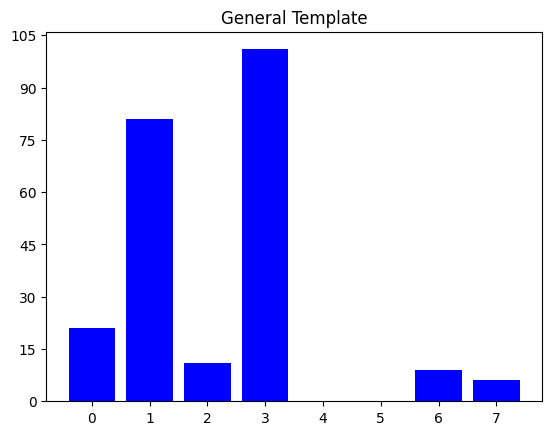

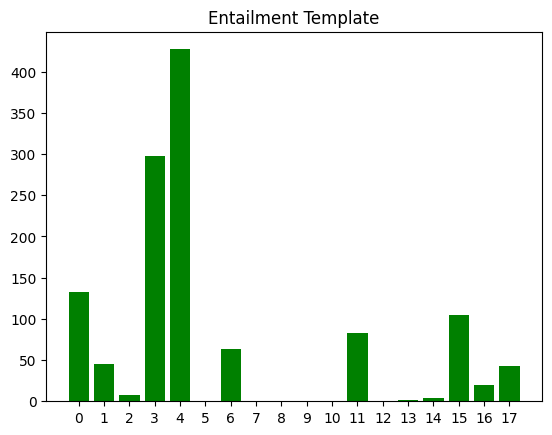

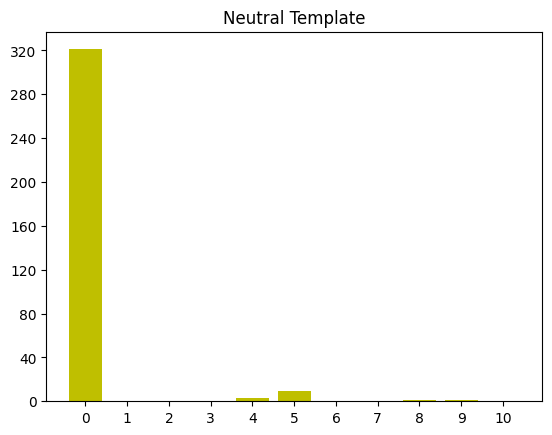

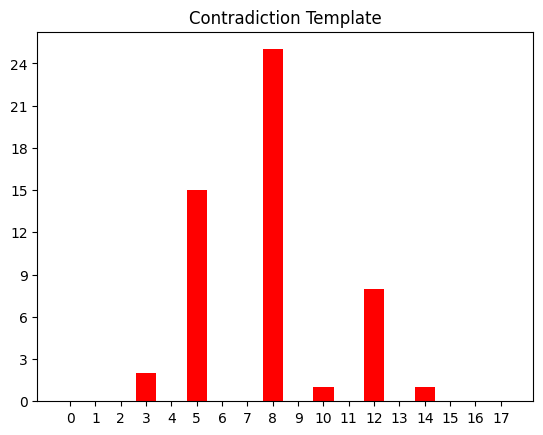

In [461]:
visualize_distributions(stats_explanation_model)

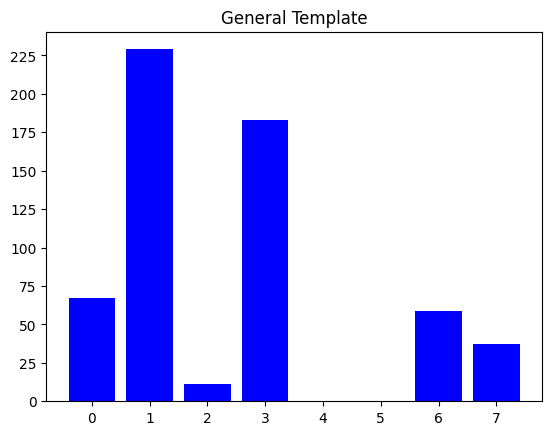

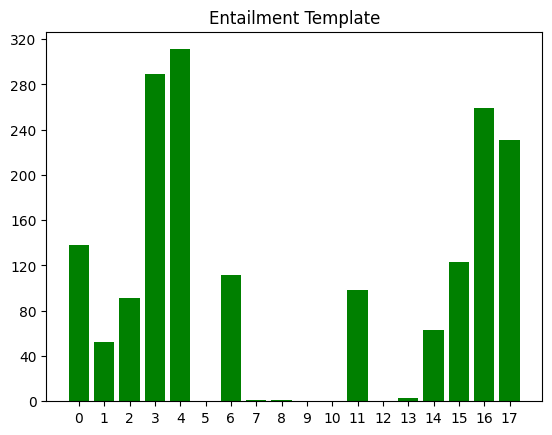

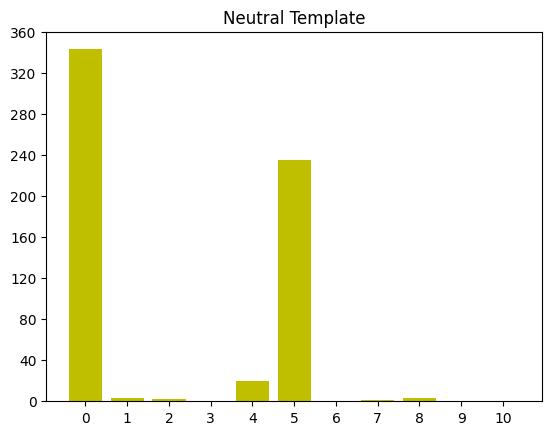

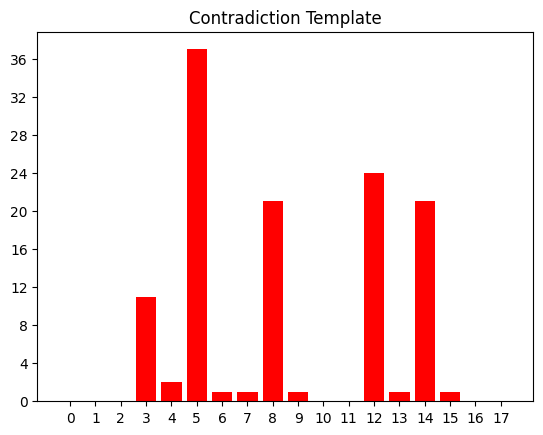

In [15]:
visualize_distributions(stats_label_explanation_model)

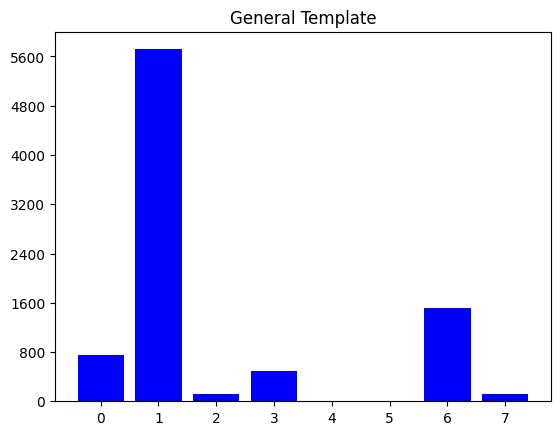

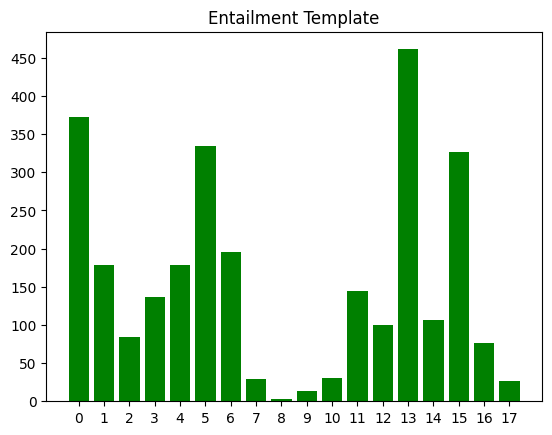

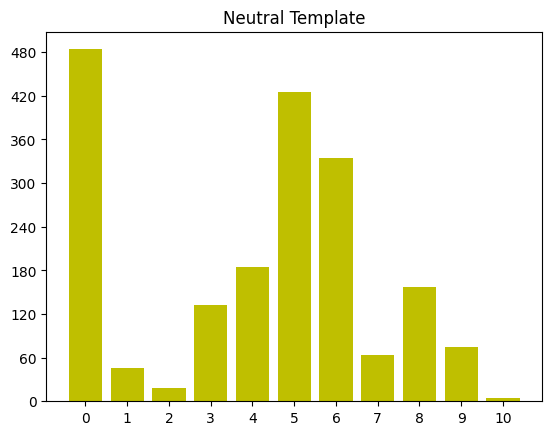

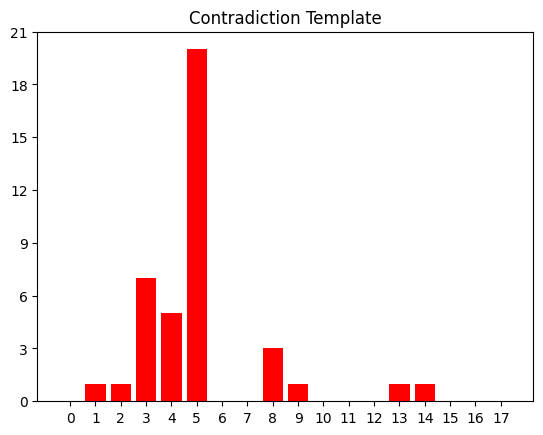

In [502]:
visualize_distributions(stats_training_data)

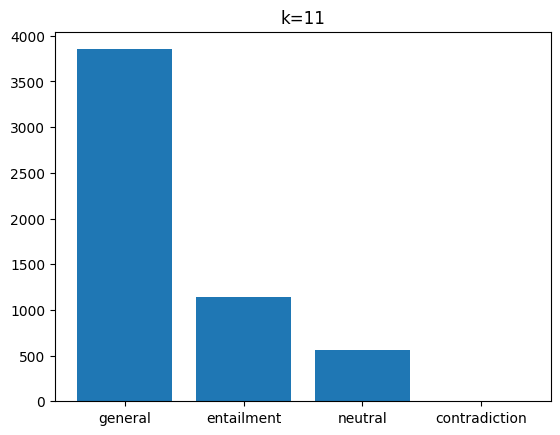

In [521]:
plt.figure()
plt.bar(list(stats_training_data['count'].keys()), stats_training_data['count'].values())
plt.title('k=11')
plt.show()

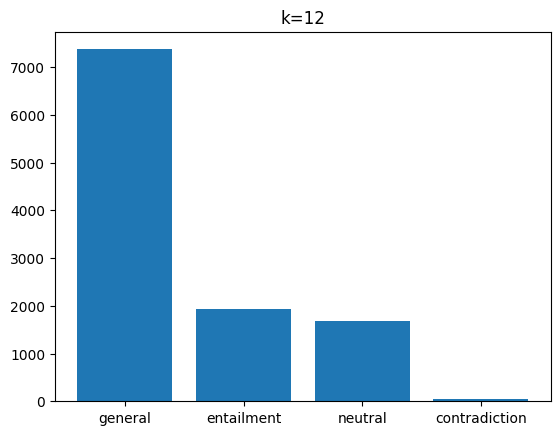

In [513]:
plt.figure()
plt.bar(list(stats_training_data['count'].keys()), stats_training_data['count'].values())
plt.title('k=12')
plt.show()

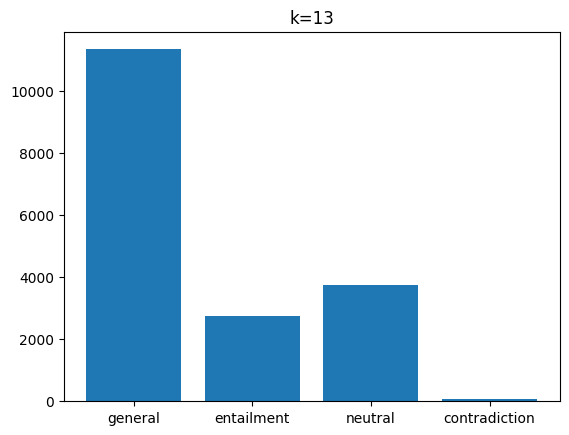

In [515]:
plt.figure()
plt.bar(list(stats_training_data['count'].keys()), stats_training_data['count'].values())
plt.title('k=13')
plt.show()

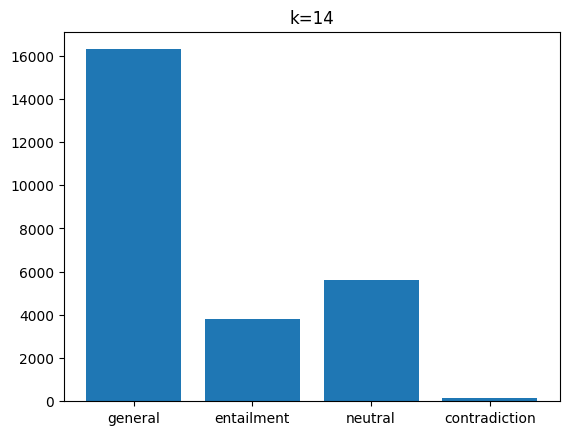

In [517]:
plt.figure()
plt.bar(list(stats_training_data['count'].keys()), stats_training_data['count'].values())
plt.title('k=14')
plt.show()

In [85]:
idx = stats_label_explanation_model['indices']['entailment'][11][12]

In [86]:
data['premise'][idx]

'A boy in an all blue uniform kicks a blue soccer ball in a grassy area.'

In [87]:
data['hypothesis'][idx]

'A boy is playing in the grass.'

In [88]:
data['rug-nlp-nli/flan-base-nli-label-explanation_prediction'][idx]

'entailment: A boy in an all blue uniform kicks a blue soccer ball in a grassy area simply means boy is playing in the grass'

In [525]:
total_indices = []
total_indices += sum(stats_training_data['indices']['general'].values(), [])
total_indices += sum(stats_training_data['indices']['entailment'].values(), [])
total_indices += sum(stats_training_data['indices']['neutral'].values(), [])
total_indices += sum(stats_training_data['indices']['contradiction'].values(), [])
total_indices = set(total_indices)